In [146]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [123]:
df = pd.read_csv('diabetes.csv')
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


In [124]:
df.dtypes

PatientID                   int64
Pregnancies                 int64
PlasmaGlucose               int64
DiastolicBloodPressure      int64
TricepsThickness            int64
SerumInsulin                int64
BMI                       float64
DiabetesPedigree          float64
Age                         int64
Diabetic                    int64
dtype: object

In [125]:
x_data = df[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']]
y_data = df['Diabetic']

x_data

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
9995,6,95,85,37,267,18.497542,0.660240,31
9996,0,55,51,7,50,21.865341,0.086589,34
9997,5,99,59,47,67,30.774018,2.301594,43
9998,0,145,67,30,21,18.811861,0.789572,26


In [126]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

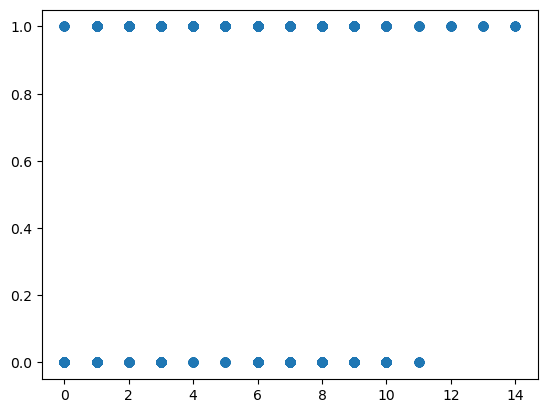

In [127]:
plt.scatter(X_train['Pregnancies'], y_train)
plt.show()

In [128]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\biala\miniconda3\envs\datas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
clf.predict_proba(X_test)

array([[0.17889229, 0.82110771],
       [0.83132964, 0.16867036],
       [0.96880044, 0.03119956],
       ...,
       [0.47898949, 0.52101051],
       [0.83343253, 0.16656747],
       [0.95649786, 0.04350214]])

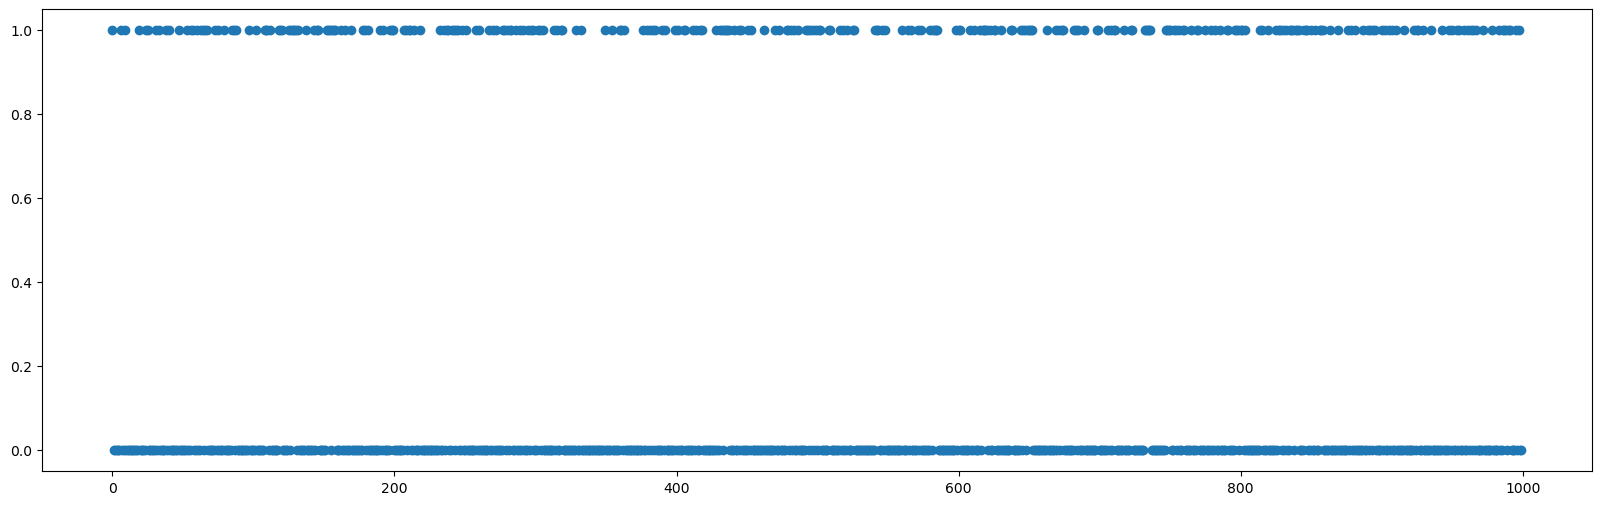

In [148]:
res = clf.predict(X_test)
plt.figure(figsize=(20, 6))
plt.scatter(range(len(res)), res)

In [149]:
confusion_matrix(y_test, res)

array([[568, 100],
       [128, 204]], dtype=int64)

In [130]:
# Split data into training and testing sets
training_data = x_data[: int(len(x_data) * 0.7)]
testing_data = x_data[int(len(x_data) * 0.7) :]

training_labels = y_data[: int(len(y_data) * 0.7)]
testing_labels = y_data[int(len(y_data) * 0.7) :]

In [131]:
# Convert all columns to float
training_data = training_data.apply(lambda col: col.astype(float))
training_data

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.0,171.0,80.0,34.0,23.0,43.509726,1.213191,21.0
1,8.0,92.0,93.0,47.0,36.0,21.240576,0.158365,23.0
2,7.0,115.0,47.0,52.0,35.0,41.511523,0.079019,23.0
3,9.0,103.0,78.0,25.0,304.0,29.582192,1.282870,43.0
4,1.0,85.0,59.0,27.0,35.0,42.604536,0.549542,22.0
...,...,...,...,...,...,...,...,...
6995,1.0,68.0,49.0,32.0,86.0,38.795348,0.260458,26.0
6996,5.0,114.0,64.0,29.0,405.0,22.736648,1.475287,60.0
6997,1.0,95.0,111.0,17.0,42.0,19.422898,0.166728,22.0
6998,0.0,72.0,67.0,23.0,34.0,39.617359,0.700948,21.0


In [132]:
# Normalize data by min-max scaling
training_data = training_data.apply(lambda col: (col - col.min()) / (col.max() - col.min()))
training_data

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.000000,0.858108,0.602151,0.317647,0.011509,0.668950,0.512887,0.000000
1,0.571429,0.324324,0.741935,0.470588,0.028133,0.080345,0.036291,0.035714
2,0.500000,0.479730,0.247312,0.529412,0.026854,0.616134,0.000440,0.035714
3,0.642857,0.398649,0.580645,0.211765,0.370844,0.300826,0.544370,0.392857
4,0.071429,0.277027,0.376344,0.235294,0.026854,0.645024,0.213034,0.017857
...,...,...,...,...,...,...,...,...
6995,0.071429,0.162162,0.268817,0.294118,0.092072,0.544342,0.082419,0.089286
6996,0.357143,0.472973,0.430108,0.258824,0.500000,0.119889,0.631308,0.696429
6997,0.071429,0.344595,0.935484,0.117647,0.035806,0.032302,0.040070,0.017857
6998,0.000000,0.189189,0.462366,0.188235,0.025575,0.566069,0.281443,0.000000


In [133]:
model = linear_model.LogisticRegression()
model.fit(x_data, y_data.values)

model.coef_

C:\Users\biala\miniconda3\envs\datas\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.2451289 ,  0.00383165, -0.00532684,  0.01142741,  0.00340067,
         0.0519977 ,  2.3693676 ,  0.05932306]])

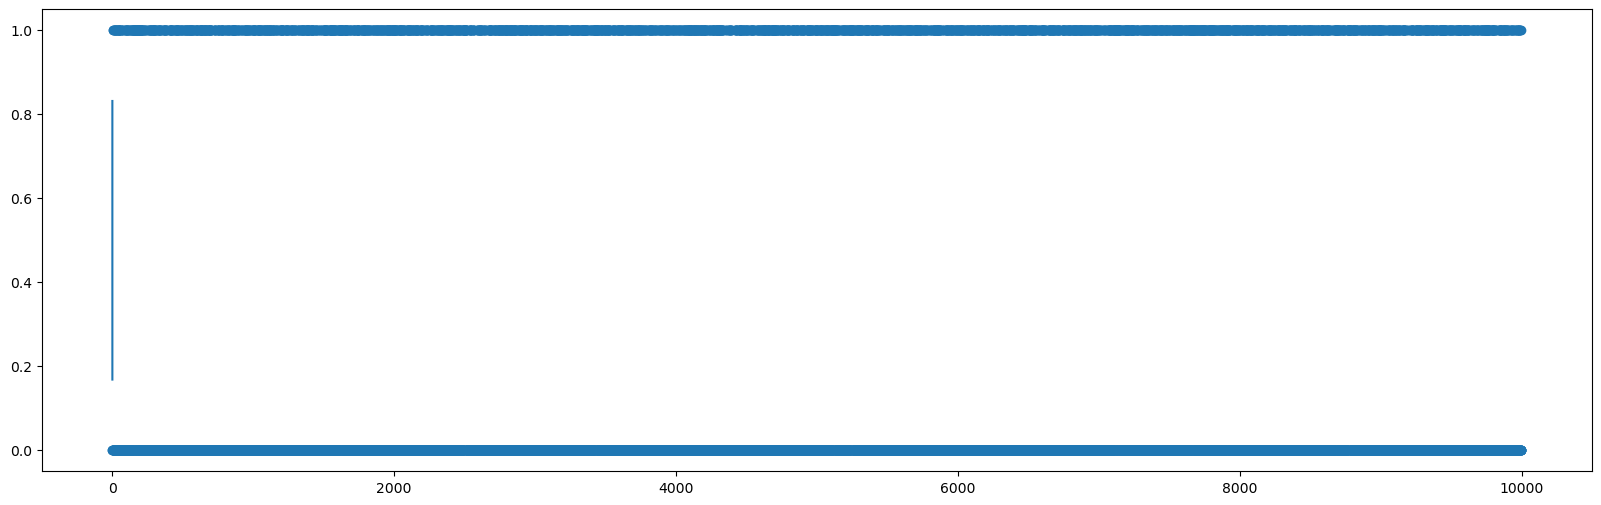

In [134]:
prediction = model.predict_proba(x_data)

plt.figure(figsize=(20, 6))
plt.plot(prediction[0], prediction[1])
plt.scatter(range(len(y_data)), y_data)

In [135]:
model.score(x_data, y_data)

0.7726